<a href="https://colab.research.google.com/github/subhash505/NLP_code/blob/main/10_2_edge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

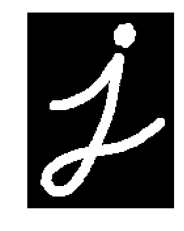

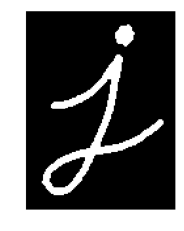

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('j.png')
kernel = np.ones((5,5))
erosion = cv2.erode(img, kernel, iterations = 1)

plt.axis("off")
plt.imshow(img)
plt.show()

plt.axis("off")
plt.imshow(erosion)
plt.show()

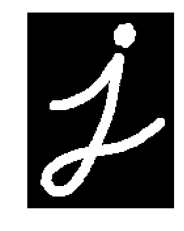

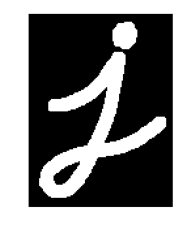

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('j.png')
kernel = np.ones((5,5))
erosion = cv2.dilate(img, kernel, iterations = 1)

plt.axis("off")
plt.imshow(img)
plt.show()

plt.axis("off")
plt.imshow(erosion)
plt.show()

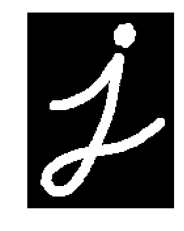

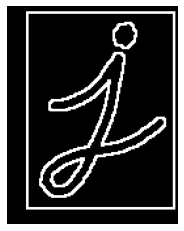

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('j.png')
kernel = np.ones((5,5))
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)

plt.axis("off")
plt.imshow(img)
plt.show()

plt.axis("off")
plt.imshow(gradient)
plt.show()

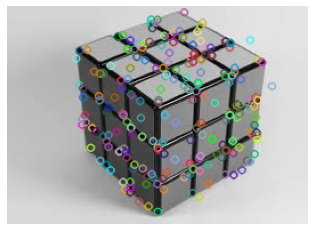

In [ ]:
#SHIFT
import cv2
import numpy as np
import matplotlib.pyplot as plt
  
img = cv2.imread('cube.jpg')
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
sift = cv2.xfeatures2d.SIFT_create()
kp = sift.detect(gray,None)
img=cv2.drawKeypoints(gray,kp,img)

plt.axis("off")
plt.imshow(img)
plt.show()

img=cv2.drawKeypoints(gray,kp,outImage = None,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.imwrite('sift_keypoints.jpg',img)

sift = cv2.xfeatures2d.SIFT_create()
kp, des = sift.detectAndCompute(gray,None)

In [ ]:
#Histogram
import cv2
import numpy as np
from matplotlib import pyplot as plt

#roi is the region of object we need to find
roi = cv2.imread('patch.jpg') 
hsv = cv2.cvtColor(roi,cv2.COLOR_BGR2HSV)
#target is the image we search in
target = cv2.imread('messi5.jpg')
hsvt = cv2.cvtColor(target,cv2.COLOR_BGR2HSV)
# Find the histograms using calcHist. Can be done with np.histogram2d also
roihist = cv2.calcHist([hsv],[0, 1], None, [180, 256], [0, 180, 0, 256] )
cv2.normalize(roihist,roihist,0,255,cv2.NORM_MINMAX)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

We then find the ratio histogram 
R
 defined for each bin 
j
 as

In [ ]:
R=cv2.calcBackProject([hsvt],[0,1],roihist,[0,180,0,256],1)

This backprojected image is then convolved with a mask, which for an object of compact shape and unknown orientation can be a circle of same area as that of the object.

In [ ]:
# convolution with a circular disc, B = D * B, where D is the disc kernel
disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
cv2.filter2D(R,-1,disc,R)
R = np.uint8(R)
cv2.normalize(R,R,0,255,cv2.NORM_MINMAX)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

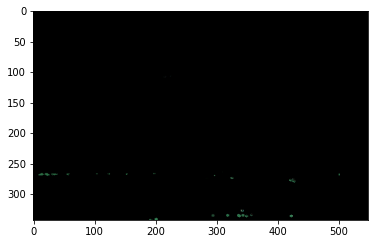

In [ ]:

from google.colab.patches import cv2_imshow
ret,R = cv2.threshold(R,50,255,0)
res=cv2.merge((R,R,R))
res=cv2.bitwise_and(res,target)
#img = cv2.imread(res.imag, cv2.IMREAD_UNCHANGED)
plt.imshow(res)
#cv2.imshow(res)
cv2.waitKey(0) & 0xFF
cv2.destroyAllWindows()